# Predicting Health Insurance Costs
* Using the Medical Cost Data Set from Kaggle

### Columns

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

In [1]:
#Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


### Import and read the data 

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
#Brief look at data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploring The Dataset

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values, but we have categorical data which are objects so we just convert them into float64 or int64 via methods such as one hot encoding

In [6]:
#Finding out which features are correlated with charges 
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


From this all the factors don't have a high correlation with charges, age has the most notable correlation with 0.299008,

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

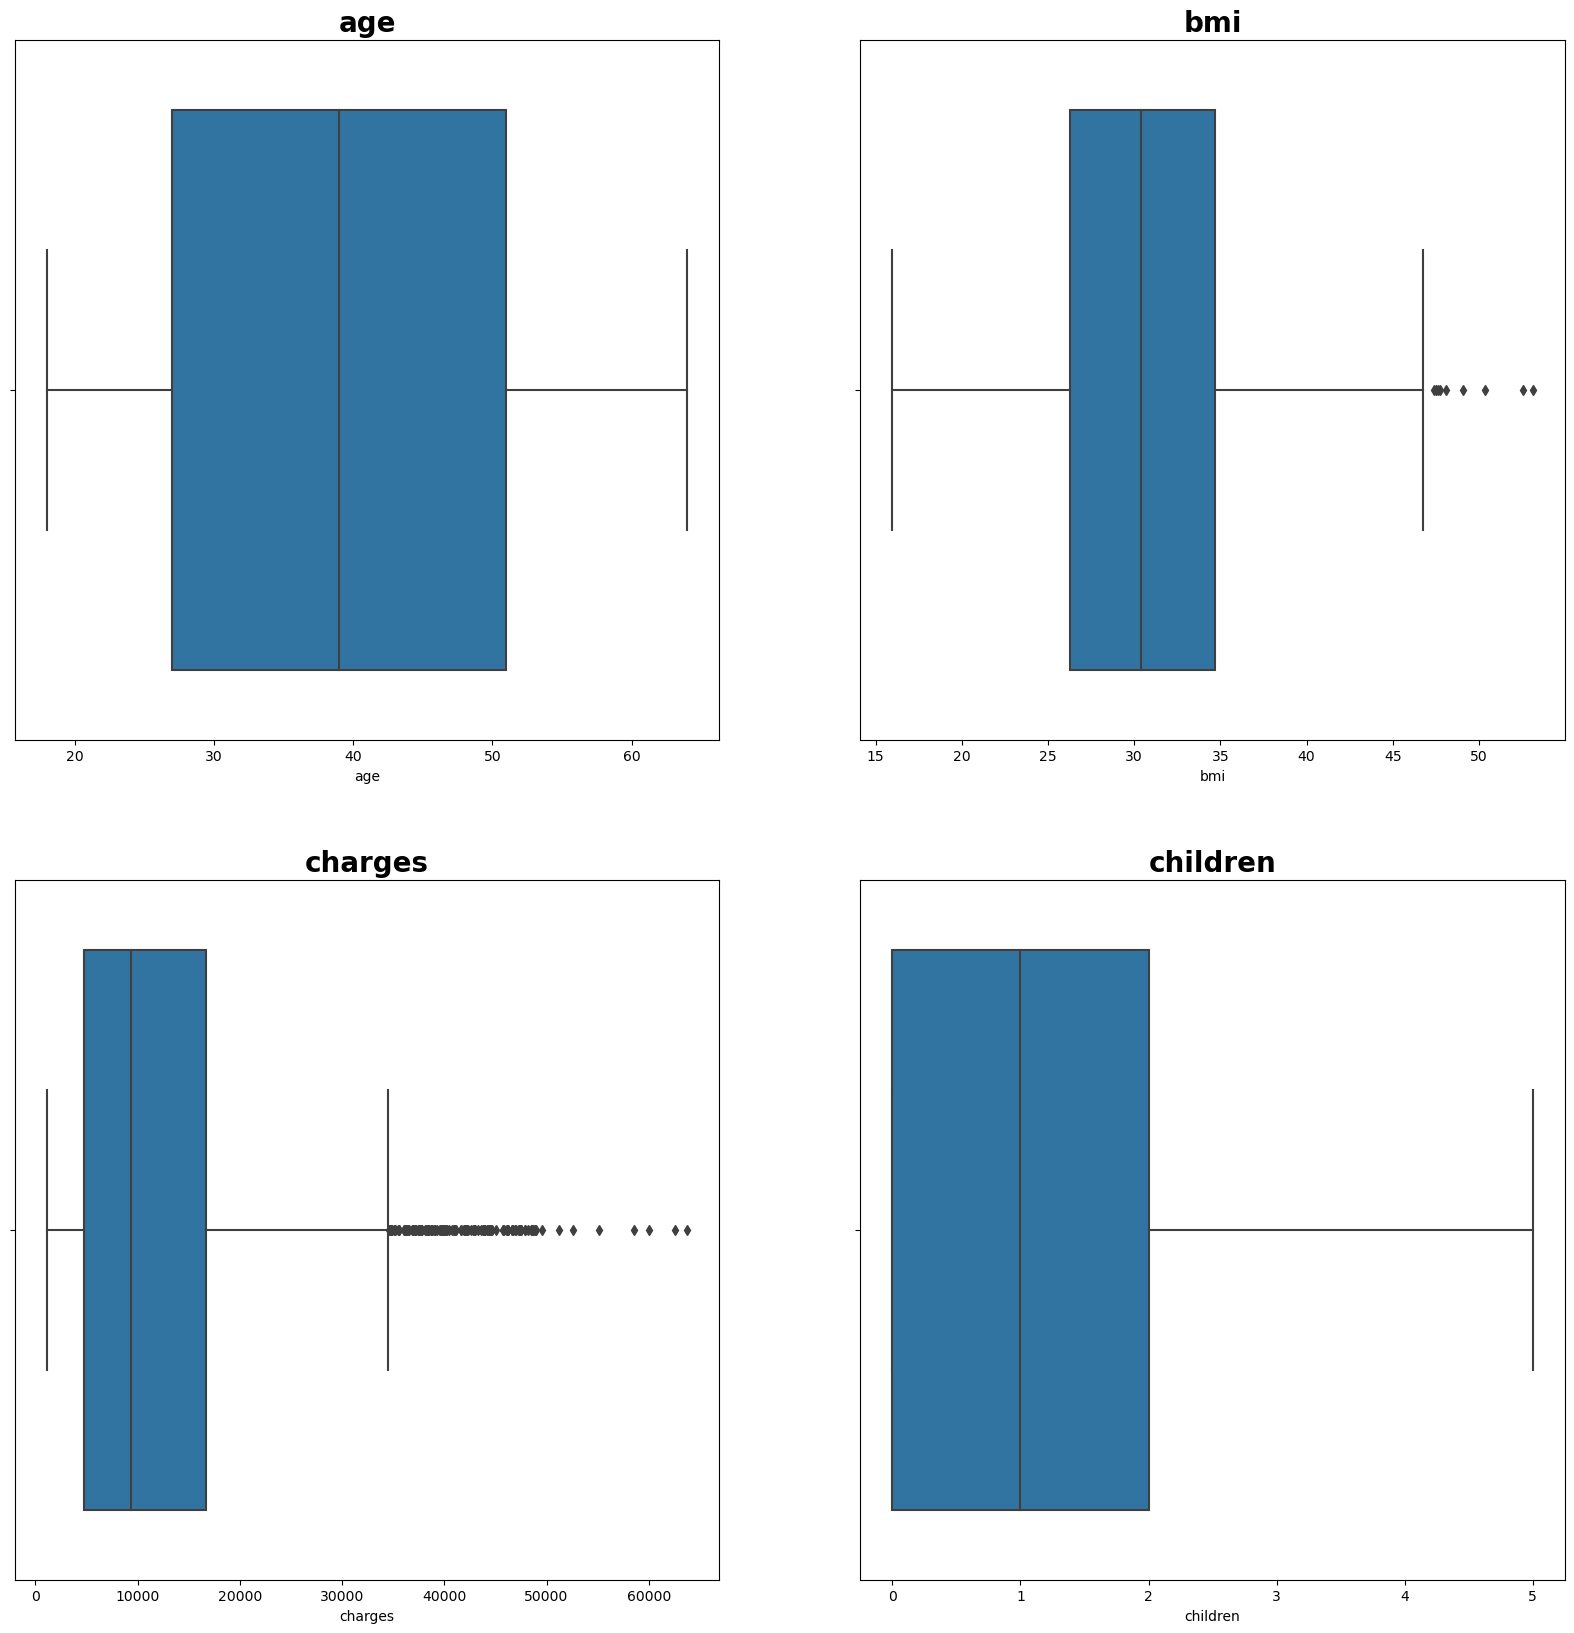

In [9]:
#Data Visualisation for 
plt.figure(figsize=(20,20))

cols=["age","bmi","charges","children"]
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=insurance,x=col)
    plt.title(f"{col}",fontsize=20,weight="bold")
    
    
plt.show()

* age distribution (Min: 18, Max:64, Mean: 39)
* bmi distribution (Min: 16, Max:53, Mean: 31)
* children distribution (Min: 0, Max:5, Mean: 1.2)
* charges distribution (Min: 1,122, Max:63,770, Mean: 13,270)

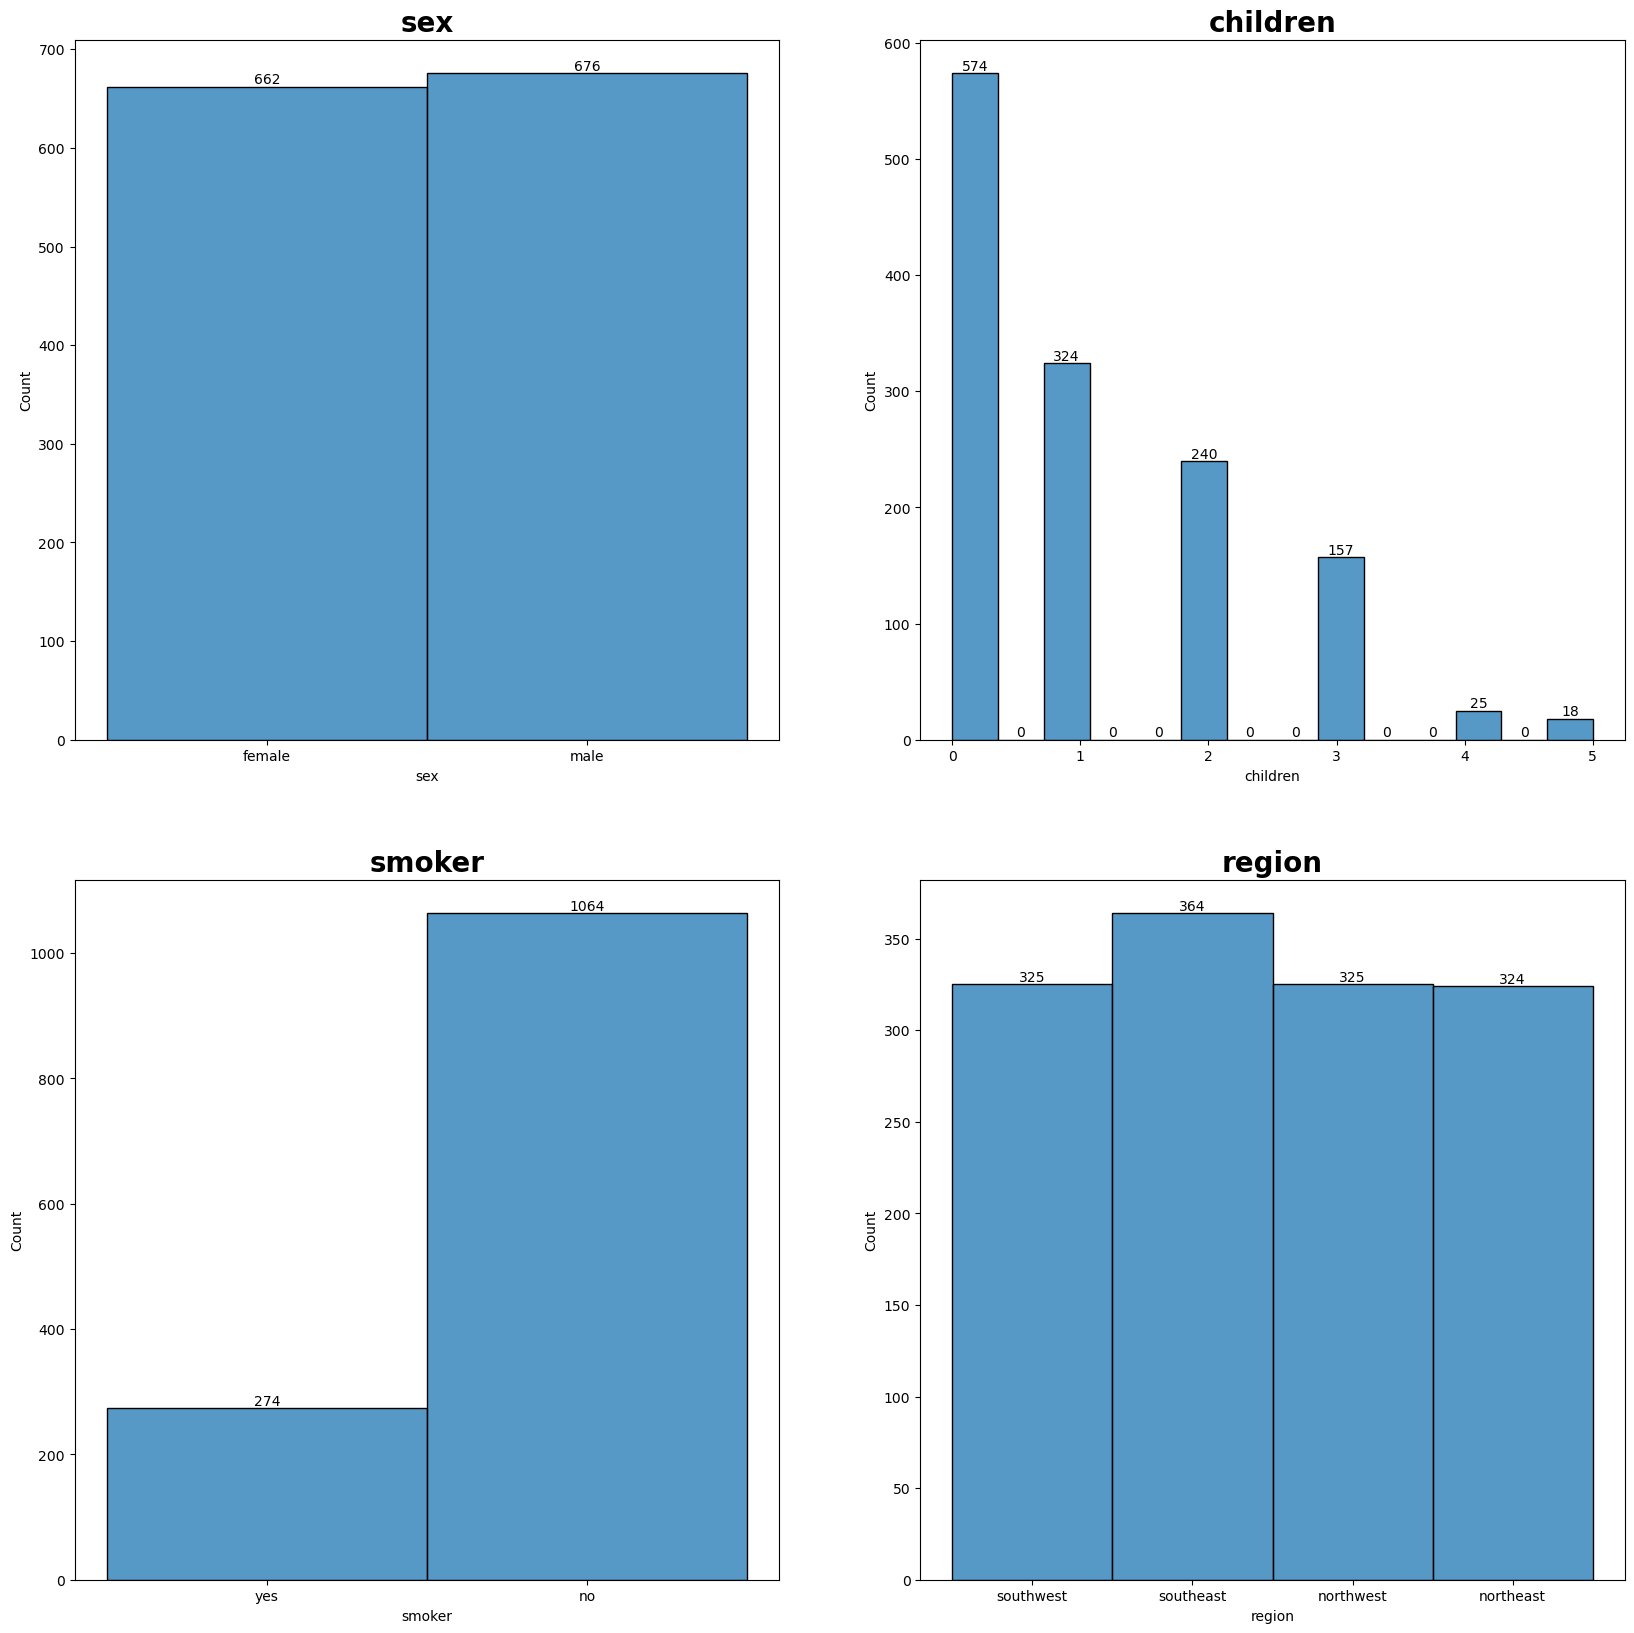

In [10]:
plt.figure(figsize=(20,20))

cols=["sex","children","smoker","region"]
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    p=sns.histplot(data=insurance,x=col)
    plt.title(f"{col}",fontsize=20,weight="bold")
    p.bar_label(p.containers[0])
plt.show()

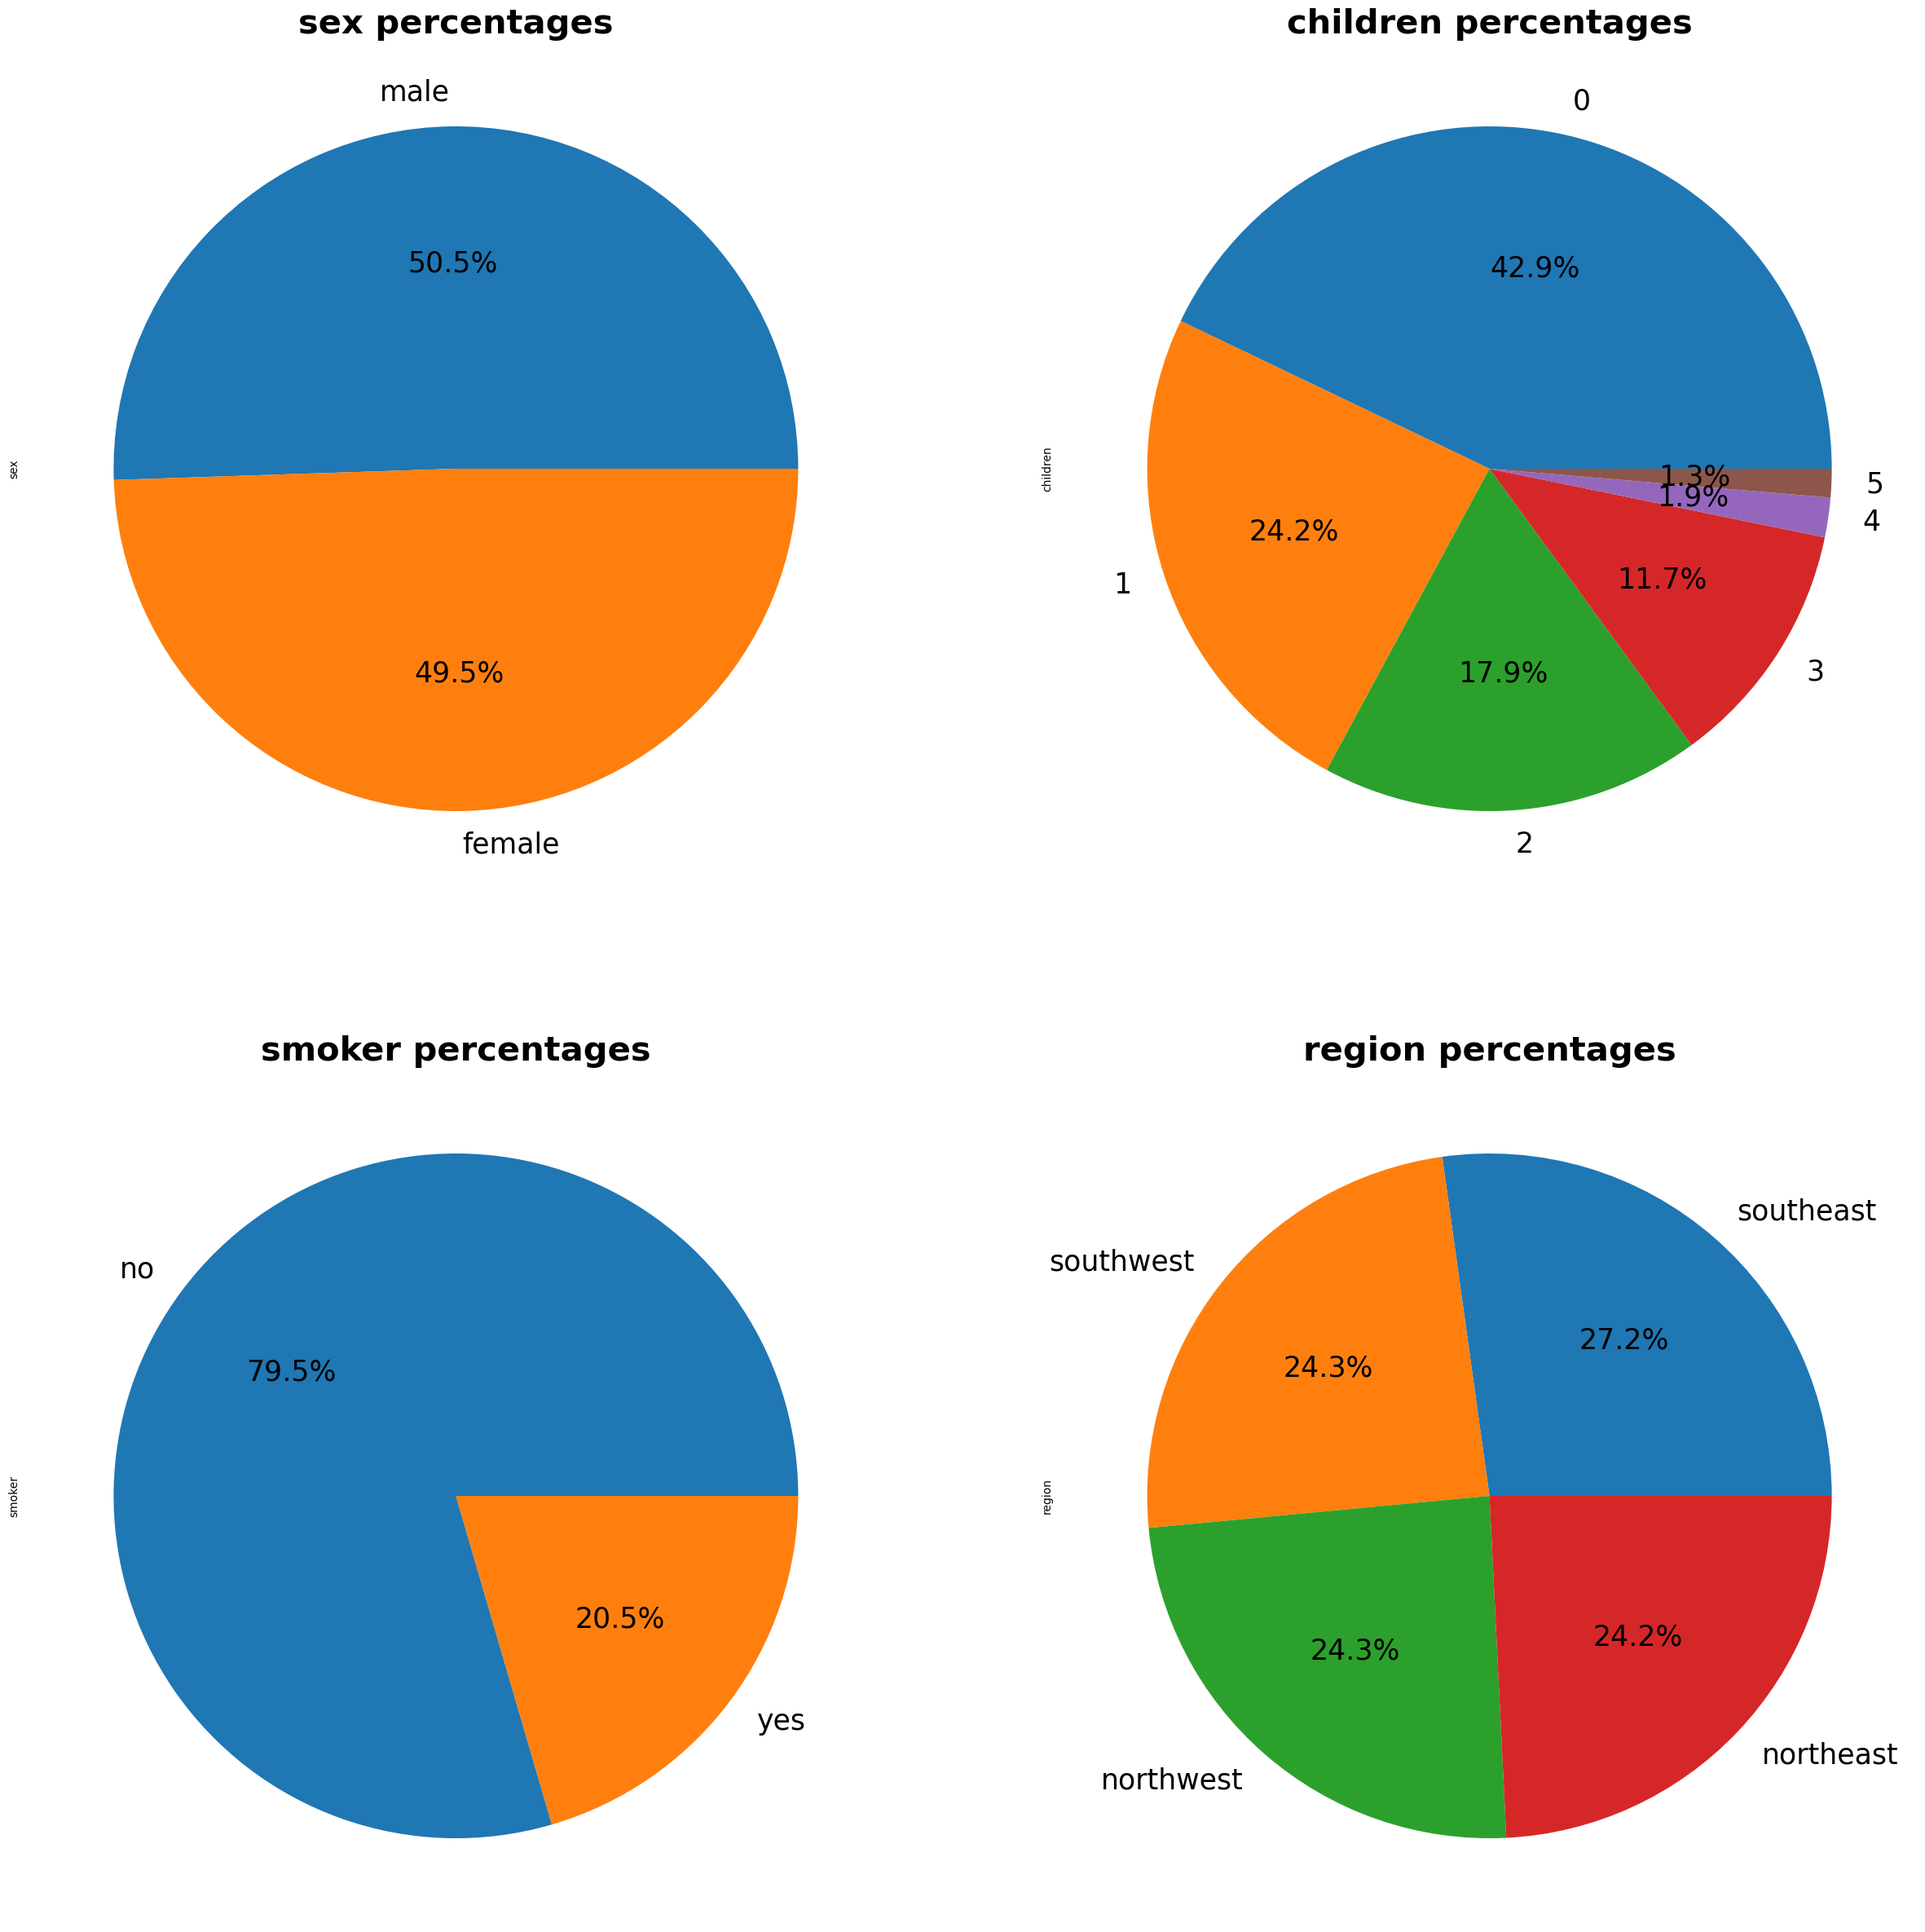

In [11]:
plt.figure(figsize=(30,30))

cols=["sex","children","smoker","region"]
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    insurance[col].value_counts().plot.pie(autopct="%1.1f%%",textprops={"fontsize": 25})
    plt.title(f"{col} percentages",fontsize=30,weight="bold")
plt.show()

* Sex is evenly split 
* Most people have 0 children and the least have 4 or 5 
* Most people dont smolke (79.5%)
* The regions are roughly evenly split 



Text(0.5, 1.0, 'Charges vs Age')

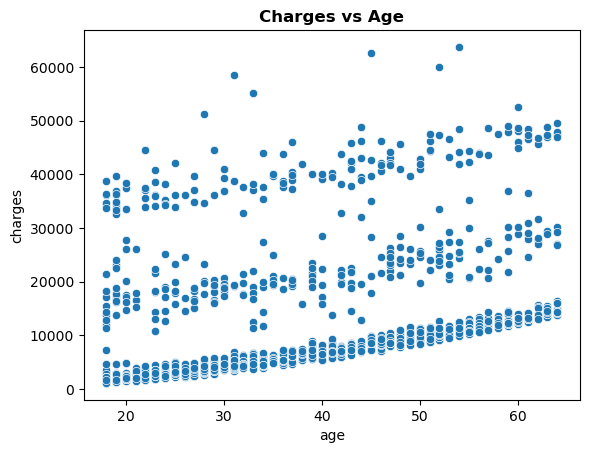

In [12]:
#looking at the relationship between age and charges
sns.scatterplot(data=insurance,x="age",y="charges")
plt.title("Charges vs Age", weight="bold")

Nothing of value was gained from this, just highlights that individually the age doesn't have a correlation to the charges, indicates the charges are specified by many factors at once

### Next changing the categorical data into numerical values
* Male = 1

* Female = 0

* Smoker=1

* Non-Smoker=0

In [13]:
#creating a copy of the data that we can modify
insurance_modif=insurance.copy()

#one hot encoding 
insurance_modif["sex"]= insurance_modif["sex"].apply(lambda x:1 if x == "male" else 0)
insurance_modif["smoker"]= insurance_modif["smoker"].apply(lambda x:1 if x == "yes" else 0)

Now have to do the same but for region, however as no region is better than the other we can't assign number0-3 to them, so will have to create dummy columns

In [14]:
#get the region column and create dummies using pd.get_dummies
regions = insurance_modif["region"]
dummies = pd.get_dummies(regions).reset_index(drop=True)

#concat this with the dataset and drop the original region column
insurance_mod = insurance_modif.drop("region",axis=1)

insurance_m= pd.concat([dummies,insurance_mod],axis=1)

#brief display of the modified data
insurance_m.head()

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,0,0,0,1,19,0,27.900,0,1,16884.92400
1,0,0,1,0,18,1,33.770,1,0,1725.55230
2,0,0,1,0,28,1,33.000,3,0,4449.46200
3,0,1,0,0,33,1,22.705,0,0,21984.47061
4,0,1,0,0,32,1,28.880,0,0,3866.85520


In [15]:
insurance_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   northeast  1338 non-null   uint8  
 1   northwest  1338 non-null   uint8  
 2   southeast  1338 non-null   uint8  
 3   southwest  1338 non-null   uint8  
 4   age        1338 non-null   int64  
 5   sex        1338 non-null   int64  
 6   bmi        1338 non-null   float64
 7   children   1338 non-null   int64  
 8   smoker     1338 non-null   int64  
 9   charges    1338 non-null   float64
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


As we can see we don't have any objects datatypes anymore, so the data can now be fed into the model

<AxesSubplot:>

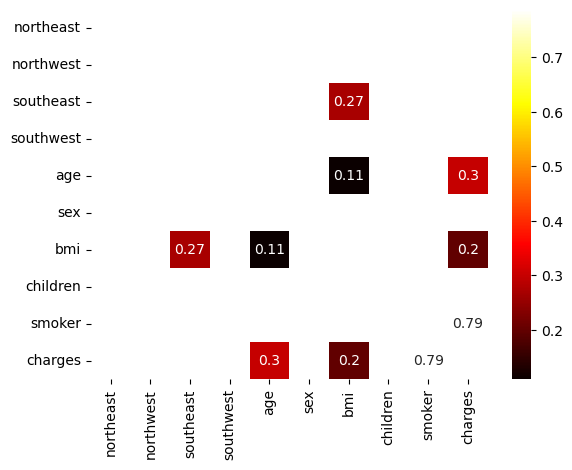

In [16]:
#visualise the relationship between variables after one hot encoding
correlation=insurance_m.corr()
sns.heatmap(correlation[(correlation>0.1)&(correlation<1)],annot=True,cmap="hot")


In [17]:
insurance_m["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

### Dividing the data

In [18]:
#Splitting the data into X and y and the using train_test_split split data into test and train which can be used to train then test model 
X = insurance_m.drop("charges",axis=1)
y = insurance_m["charges"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

### Building the Model

In [19]:
#Create the model and fit the data
model1 =LinearRegression()
model1.fit(X_train,y_train)

#predict charges based on just the training data
test_pred =model1.predict(X_test)

# look at the mean squared error and R2 value 
error = mean_squared_error(y_test,test_pred,squared=False)
r2 = r2_score(y_test,test_pred)


print(f"The error is {error}")
print(f"The R2 value is {r2}")

The error is 6194.214120676812
The R2 value is 0.703531234152132


Due to the error being high may want to revisit the data, in this case we will have a look at the relationship between features and charges 

In [20]:
insurance_m.corr()["charges"] 

northeast    0.006349
northwest   -0.039905
southeast    0.073982
southwest   -0.043210
age          0.299008
sex          0.057292
bmi          0.198341
children     0.067998
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

* The regions have very low or negative correlations except southwest, however we can't just keep one region as it will cause our model to be biast towards that 1 region so we will exclude all the regions and need to scale the data so we can possibly avoid larger errors. 
* The gender has a relatively low correlation as well indicating there is little relationship between gender and the charge
* The number of children has little correlation with charges as well, this may be because the charge is based on the type of health condition someone may have which is unlikely to be caused by children or the number of children

In [21]:
insurance_modif

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [22]:
#The dataframe without the regions 
insurance_n = insurance_modif.drop(axis=1,columns=["sex","children","region"])
insurance_n.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


Creating the model with the new dataframe and scaled data

In [23]:
X = insurance_n.drop("charges",axis=1)
scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)

y = insurance_n["charges"]

X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2,random_state=45)

In [24]:
#Create the model and fit the data
model2 =LinearRegression()
model2.fit(X_train,y_train)

#predict charges
test_pred =model2.predict(X_test)

# look at the mean squared error and R2 value 
error = mean_absolute_error(y_test,test_pred)
r2 = r2_score(y_test,test_pred)


print(f"The error is {error}")
print(f"The R2 value is {r2}")

The error is 4410.3513916445245
The R2 value is 0.7004178368864946


In [25]:
print(f"Range:{y.max()- y.min()}")

Range:62648.554110000005


* R2 value being above 0.7 indicates that there is a good correlation between the predicited values and the actual values
* The error at the moment looks high but in the context of our problem it is reasonable, the range is 62648.55 so an error around 4000 makes sense due to the scale of the data being very large 

In [26]:
#create a coefficient table 
coefficient = model2.coef_
coeff_table = pd.DataFrame(data=coefficient,index=["age","bmi","smoker"])
coeff_table = coeff_table.rename(columns={0:"coefficient"})
coeff_table = coeff_table.round(2)

intercept=model2.intercept_

print(f"The intercept is {intercept} ")
coeff_table

The intercept is -1728.3530856675497 


,coefficient
age,11724.38
bmi,11962.89
smoker,24193.67


#  Residual Diagnostics

* A residual is the difference between the predicted data and the actual data.

Text(0, 0.5, 'Residual')

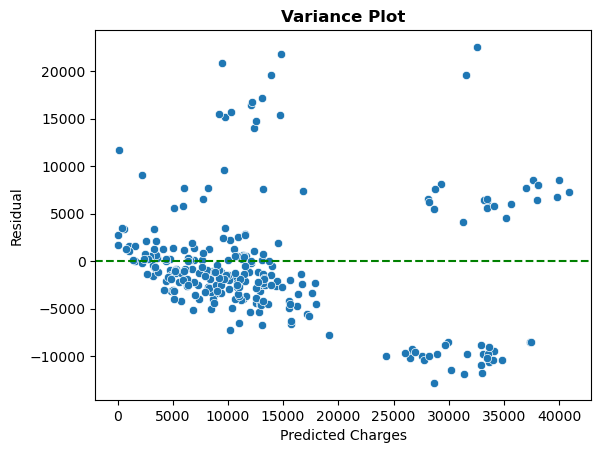

In [27]:
residuals = y_test - test_pred

# plot this against the predicted data
sns.scatterplot(x=test_pred,y=residuals)
plt.axhline(y=0,color="g",linestyle="--")
plt.title("Variance Plot", weight="bold")
plt.xlabel("Predicted Charges")
plt.ylabel("Residual")

Graph shows most residual data is centralised around 0, which is good, but there is a significant amount of stray data that is not centralised around 0 

To try to improve the model will try to scale the target value (charges) by taking logs, this will make the data more "normal-like" and symetric, this can be seen in the coefficients table displayed below 

In [28]:
y_train_log = np.log2(y_train)
y_test_log = np.log2(y_test)


#Create the model and fit the data
model3 =LinearRegression()
model3.fit(X_train,y_train_log)

#predict charges
test_pred =model3.predict(X_test)

# look at the mean squared error and R2 value 
error = mean_absolute_error(y_test_log,test_pred)
r2 = r2_score(y_test_log,test_pred)


print(f"The mean absolute error is {error:.4}")
print(f"The R2 value is {r2:.4}")

The mean absolute error is 0.3982
The R2 value is 0.754


The R2 value has increased ,meaning there is greater correlation between the predicted data and the test data , the error has decreased by a significant amount this may give an inaccurate representation of the results as we have taken logs, the best way to check this would be to see the residual plot 

Text(0, 0.5, 'Residual')

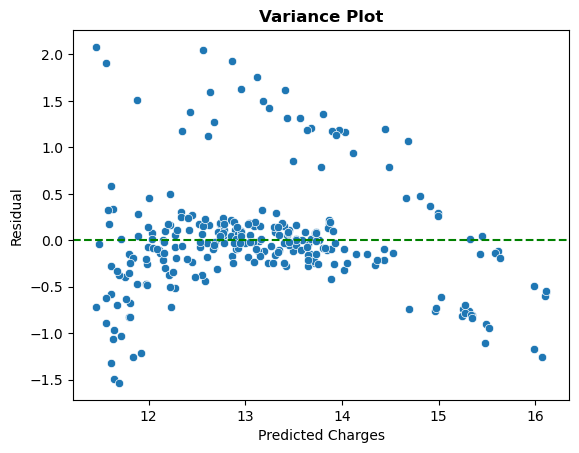

In [32]:
residuals = y_test_log - test_pred

# plot this against the predicted data
sns.scatterplot(x=test_pred,y=residuals)
plt.axhline(y=0,color="g",linestyle="--")
plt.title("Variance Plot", weight="bold")
plt.xlabel("Predicted Charges")
plt.ylabel("Residual")

Visually the residuals to tend towards 0 as the value of the charge increases which is a good indicator, and the residuals are within in a reasonable range as well 

In [33]:
# Get the coefficients for each feature and display it in a pandas dataframe and the intercept
coeff=model3.coef_

#create a coefficient table 
coeff = pd.DataFrame(data=coeff,index=["age","bmi","smoker"])
coeff_table=coeff.rename(columns={0:"coefficient"})
coeff=coeff_table.round(3)

inter=model3.intercept_

print(f"The intercept is {inter:.5} ")
coeff

The intercept is 11.369 


,coefficient
age,2.323
bmi,0.561
smoker,2.264


#### Takeaways
* The data does have less stray data then before, but I believe this data may give an unrealiable impression of what's happening as by taking logs the y values naturally become scaled to v.low values , therefore even if there is stray residuals not centered closely around 0 it will still seem as if its somewhat close to 0 
* Adding to this the R2 value didnt change as much, the R2 value is a measure of correlation between the actual data and the predicted data and therefore  

##### Going forward it would be best to scale the features but leave the target data as is 

# Final Model Evaluation

From the insights gained, due to the marginal increase in the R2 value will choose to use the y values that are altered, and the X values will not include the regions,sex and children and we will use the test data

In [34]:
X = insurance_n.drop("charges",axis=1)
scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)

y = insurance_n["charges"]

X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2,random_state=45)

y_train_log = np.log2(y_train)
y_test_log = np.log2(y_test)

model = LinearRegression()
model.fit(X_train,y_train_log)
test_pred = model.predict(X_test)


error = mean_absolute_error(y_test_log,test_pred)
r2 = r2_score(y_test_log,test_pred)

intercept_final=model.intercept_
coefficient_final=model.coef_

print(f"Intercept of the model is {intercept_final}")

print(f"root mean squared error is {error:.8}")
print(f"R2 is {r2:.4}")

coefficient_table=pd.DataFrame(data=coefficient_final,index=["age","bmi","smoker"])
coefficient_table=coefficient_table.rename(columns={0:"coefficient"})
coefficient_table=coefficient_table.round(2)
coefficient_table

Intercept of the model is 11.368750279956338
root mean squared error is 0.39816403
R2 is 0.754


,coefficient
age,2.32
bmi,0.56
smoker,2.26


#### Summary
###### The model starts at -1728.35 (intercept ) and increases according to the age bmi and wether they are a smoker 

* The R2 score is a good value above 0.7, the RMSE is relatively low which is good , so both indicators imply our model is accurate to a certain degree 

### Note 
If this model were to be deployed you would have to convert the y values from logarithmic form, to do this 

Would have to run 2^(y_test_pred)

To improve the model may use more data or more features, or we could change the split % of the data 

In [35]:
#Code to convert predicted y_values back to normal 

y_pred_norm = {"The true predicted y_vals":2**(test_pred)}
y_p=pd.DataFrame(data=y_pred_norm)

y_p

,The true predicted y_vals
0,3461.538697
1,7593.865750
2,64900.270946
3,3361.183321
4,6217.193486
...,...
263,2810.545124
264,4020.577609
265,5904.379443
266,4561.764263
